In [1]:
!wget http://www.cs.cmu.edu/~enron/enron_mail_20110402.tgz -O /content/enron_mail_20110402.tgz
!tar -xzf /content/enron_mail_20110402.tgz -C /content/
!ls /content/enron_mail_20110402/maildir | head


--2025-09-09 15:03:49--  http://www.cs.cmu.edu/~enron/enron_mail_20110402.tgz
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://download.srv.cs.cmu.edu/~enron/enron_mail_20110402.tgz [following]
--2025-09-09 15:03:50--  http://download.srv.cs.cmu.edu/~enron/enron_mail_20110402.tgz
Resolving download.srv.cs.cmu.edu (download.srv.cs.cmu.edu)... 128.2.172.95
Connecting to download.srv.cs.cmu.edu (download.srv.cs.cmu.edu)|128.2.172.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443469519 (423M) [application/x-gzip]
Saving to: ‘/content/enron_mail_20110402.tgz’

/content/enron_mail 100%[===================>] 422.92M  4.92MB/s    in 77s     

2025-09-09 15:05:08 (5.52 MB/s) - ‘/content/enron_mail_20110402.tgz’ saved [443469519/443469519]

allen-p
arnold-j
arora-h
badeer-r
bailey-s
bass-e
baughman-d
beck-

In [2]:
import os

# Correct root path
root = "/content/enron_mail_20110402/maildir"

# Show a deeper level to verify structure
for user in os.listdir(root)[:3]:
    user_path = os.path.join(root, user)
    print(f"\nUser: {user}")
    print("Subfolders:", os.listdir(user_path)[:5])  # show first 5 folders



User: linder-e
Subfolders: ['_sent_mail', 'all_documents', 'discussion_threads', 'notes_inbox']

User: grigsby-m
Subfolders: ['sent_items', 'inbox', '_sent_mail', 'all_documents', 'sent']

User: neal-s
Subfolders: ['credit', 'storage', 'eol', 'sent_items', 'bug']


In [3]:
email_files = []
for dirpath, _, files in os.walk(root):
    for f in files:
        if f.endswith("."):
            print(f)


Streaming output truncated to the last 5000 lines.
823.
1922.
19.
1575.
773.
333.
739.
274.
544.
910.
1527.
1973.
1907.
1728.
292.
664.
436.
497.
535.
570.
1532.
1114.
2083.
1800.
188.
1012.
571.
619.
1351.
263.
1713.
1178.
1165.
1736.
782.
1359.
707.
625.
385.
746.
810.
1221.
1825.
885.
1789.
1296.
243.
364.
1504.
220.
1739.
1554.
1551.
1966.
403.
1668.
1135.
1156.
887.
1406.
1515.
234.
554.
1563.
109.
317.
1556.
225.
1069.
1813.
740.
1890.
961.
539.
837.
1332.
911.
713.
2092.
1107.
748.
646.
44.
1541.
1479.
293.
1874.
806.
722.
450.
123.
145.
1735.
679.
980.
2079.
1357.
987.
907.
1436.
701.
1548.
184.
1184.
1519.
1817.
1660.
163.
1535.
1320.
138.
522.
1234.
362.
354.
1302.
1664.
2099.
1377.
1263.
2098.
1700.
1128.
307.
461.
869.
1909.
1676.
797.
997.
2053.
1426.
1122.
802.
319.
832.
1000.
1058.
2061.
1111.
23.
413.
756.
106.
179.
280.
1380.
1142.
161.
1828.
112.
1838.
1284.
1661.
889.
1977.
474.
453.
956.
780.
715.
1629.
1314.
2025.
638.
1264.
1792.
1025.
83.
282.
1603.
1041.
30.
131

In [4]:
import os

root = "/content/enron_mail_20110402/maildir"

# Collect email files
email_files = []
for dirpath, _, files in os.walk(root):
    for f in files:
        if f.endswith('.'):  # Email files are just numbers with a dot
            email_files.append(os.path.join(dirpath, f))
    if len(email_files) >= 5:  # Stop early
        break

print(f"Found {len(email_files)} emails")
print("Sample files:", email_files[:3])

# Read one email safely
if email_files:
    with open(email_files[0], 'r', encoding='latin1') as f:
        content = f.read()
    print("\nFirst email preview:\n", content[:800])
else:
    print("No email files found!")


Found 6 emails
Sample files: ['/content/enron_mail_20110402/maildir/linder-e/_sent_mail/2.', '/content/enron_mail_20110402/maildir/linder-e/_sent_mail/1.', '/content/enron_mail_20110402/maildir/linder-e/_sent_mail/3.']

First email preview:
 Message-ID: <12438228.1075841067473.JavaMail.evans@thyme>
Date: Thu, 19 Apr 2001 19:48:00 -0700 (PDT)
From: eric.linder@enron.com
To: bill.iii@enron.com
Subject: WESTPOWER Login
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Eric Linder
X-To: Bill Williams III
X-cc: 
X-bcc: 
X-Folder: \eric linder 6-28-02\Notes Folders\'sent mail
X-Origin: LINDER-E
X-FileName: eric linder 6-28-02.nsf

Just a reminder... I'm not able to login to westpower.


In [5]:
import pandas as pd
from email import message_from_string

def parse_email(file_path):
    """Reads an email file and extracts key fields."""
    with open(file_path, 'r', encoding='latin1') as f:
        raw_email = f.read()
    msg = message_from_string(raw_email)

    # Extract fields safely
    email_data = {
        "message_id": msg.get("Message-ID"),
        "date": msg.get("Date"),
        "from": msg.get("From"),
        "to": msg.get("To"),
        "subject": msg.get("Subject"),
        "body": msg.get_payload()
    }
    return email_data

# Parse a sample of emails
parsed_emails = [parse_email(fp) for fp in email_files[:50]]

# Convert to DataFrame
df = pd.DataFrame(parsed_emails)
print(df.head())


                                      message_id  \
0  <12438228.1075841067473.JavaMail.evans@thyme>   
1  <13654501.1075841067450.JavaMail.evans@thyme>   
2   <5194611.1075841067495.JavaMail.evans@thyme>   
3   <6627542.1075841067563.JavaMail.evans@thyme>   
4  <30759990.1075841067518.JavaMail.evans@thyme>   

                                    date                   from  \
0  Thu, 19 Apr 2001 19:48:00 -0700 (PDT)  eric.linder@enron.com   
1  Thu, 26 Apr 2001 05:19:00 -0700 (PDT)  eric.linder@enron.com   
2  Wed, 18 Apr 2001 21:35:00 -0700 (PDT)  eric.linder@enron.com   
3   Mon, 9 Apr 2001 11:00:00 -0700 (PDT)  eric.linder@enron.com   
4  Sat, 14 Apr 2001 14:30:00 -0700 (PDT)  eric.linder@enron.com   

                          to  \
0         bill.iii@enron.com   
1         bill.iii@enron.com   
2  grace.rodriguez@enron.com   
3         bill.iii@enron.com   
4  grace.rodriguez@enron.com   

                                             subject  \
0                                  

In [6]:
df.to_csv("/content/enron_emails.csv", index=False)


In [7]:
# run in a Colab cell
!pip install -q transformers sentence-transformers rouge-score python-dateutil pandas


  Preparing metadata (setup.py) ... done


**Cell 1 — Collect email file paths (change MAX_EMAILS to control how many files you parse)**

In [8]:
import os, re
ROOT = "/content/enron_mail_20110402/maildir"
MAX_EMAILS = 15000   # start small (2000). Increase to 10000+ if Colab can handle it.

def collect_email_files(root, max_files=2000):
    pattern = re.compile(r'^\d+\.?$')  # filenames like '381.' or '1234'
    files_list = []
    for dirpath, _, files in os.walk(root):
        for f in files:
            if pattern.match(f) or f.lower().endswith('.txt'):
                files_list.append(os.path.join(dirpath, f))
                if len(files_list) >= max_files:
                    return files_list
    return files_list

email_files = collect_email_files(ROOT, MAX_EMAILS)
print("Collected:", len(email_files), "files")
print("Sample:", email_files[:5])


Collected: 15000 files
Sample: ['/content/enron_mail_20110402/maildir/linder-e/_sent_mail/2.', '/content/enron_mail_20110402/maildir/linder-e/_sent_mail/1.', '/content/enron_mail_20110402/maildir/linder-e/_sent_mail/3.', '/content/enron_mail_20110402/maildir/linder-e/_sent_mail/6.', '/content/enron_mail_20110402/maildir/linder-e/_sent_mail/4.']


**Cell 2 — Robust parser that extracts headers & plain-text body (handles multipart)**

In [9]:
from email import policy
from email.parser import Parser
from dateutil import parser as dateparser
import pandas as pd
import traceback

def parse_date_safe(datestr):
    try:
        if datestr is None:
            return None
        return dateparser.parse(datestr, fuzzy=True)
    except Exception:
        return None

def get_body_from_msg(msg):
    """Return concatenated text/plain parts, fallback to payload string."""
    try:
        if msg.is_multipart():
            parts = []
            for part in msg.walk():
                ctype = part.get_content_type()
                cdisp = str(part.get('Content-Disposition') or "")
                if ctype == 'text/plain' and 'attachment' not in cdisp.lower():
                    payload = part.get_payload(decode=True)
                    if payload is None:
                        text = part.get_payload()
                    else:
                        charset = part.get_content_charset() or 'latin1'
                        text = payload.decode(charset, errors='replace')
                    parts.append(text)
            return "\n".join(parts).strip()
        else:
            payload = msg.get_payload(decode=True)
            if payload:
                charset = msg.get_content_charset() or 'latin1'
                return payload.decode(charset, errors='replace')
            else:
                return str(msg.get_payload())
    except Exception:
        return ""

def parse_email_file(path):
    try:
        with open(path, 'r', encoding='latin1', errors='replace') as f:
            raw = f.read()
        msg = Parser(policy=policy.default).parsestr(raw)
        body = get_body_from_msg(msg)
        return {
            "file_path": path,
            "message_id": msg.get("Message-ID"),
            "date_raw": msg.get("Date"),
            "date_parsed": parse_date_safe(msg.get("Date")),
            "from": msg.get("From"),
            "to": msg.get("To"),
            "subject": msg.get("Subject"),
            "body": body
        }
    except Exception as e:
        return {"file_path": path, "error": str(e), "trace": traceback.format_exc()}

# Parse all collected files
parsed = []
for i, fp in enumerate(email_files):
    parsed.append(parse_email_file(fp))
    if (i+1) % 200 == 0:
        print("Parsed:", i+1)

df = pd.DataFrame(parsed)
print("Parsed DataFrame shape:", df.shape)
display(df.head())

# Save intermediate CSV
DF_SAVE = "/content/enron_parsed_sample.csv"
df.to_csv(DF_SAVE, index=False)
print("Saved parsed CSV to", DF_SAVE)


Parsed: 200
Parsed: 400
Parsed: 600
Parsed: 800
Parsed: 1000
Parsed: 1200
Parsed: 1400
Parsed: 1600
Parsed: 1800
Parsed: 2000
Parsed: 2200
Parsed: 2400
Parsed: 2600
Parsed: 2800
Parsed: 3000
Parsed: 3200
Parsed: 3400
Parsed: 3600
Parsed: 3800
Parsed: 4000
Parsed: 4200
Parsed: 4400
Parsed: 4600
Parsed: 4800
Parsed: 5000
Parsed: 5200
Parsed: 5400
Parsed: 5600
Parsed: 5800
Parsed: 6000
Parsed: 6200
Parsed: 6400
Parsed: 6600
Parsed: 6800
Parsed: 7000
Parsed: 7200
Parsed: 7400
Parsed: 7600
Parsed: 7800
Parsed: 8000
Parsed: 8200
Parsed: 8400
Parsed: 8600
Parsed: 8800
Parsed: 9000
Parsed: 9200
Parsed: 9400
Parsed: 9600
Parsed: 9800
Parsed: 10000
Parsed: 10200
Parsed: 10400
Parsed: 10600
Parsed: 10800
Parsed: 11000
Parsed: 11200
Parsed: 11400
Parsed: 11600
Parsed: 11800
Parsed: 12000
Parsed: 12200
Parsed: 12400
Parsed: 12600
Parsed: 12800
Parsed: 13000
Parsed: 13200
Parsed: 13400
Parsed: 13600
Parsed: 13800
Parsed: 14000
Parsed: 14200
Parsed: 14400
Parsed: 14600
Parsed: 14800
Parsed: 15000
Par

,file_path,message_id,date_raw,date_parsed,from,to,subject,body
0,/content/enron_mail_20110402/maildir/linder-e/...,<12438228.1075841067473.JavaMail.evans@thyme>,"Thu, 19 Apr 2001 19:48:00 -0700",2001-04-19 19:48:00-07:00,eric.linder@enron.com,bill.iii@enron.com,WESTPOWER Login,Just a reminder... I'm not able to login to we...
1,/content/enron_mail_20110402/maildir/linder-e/...,<13654501.1075841067450.JavaMail.evans@thyme>,"Thu, 26 Apr 2001 05:19:00 -0700",2001-04-26 05:19:00-07:00,eric.linder@enron.com,bill.iii@enron.com,,Steve from El Paso called. When you email the...
2,/content/enron_mail_20110402/maildir/linder-e/...,<5194611.1075841067495.JavaMail.evans@thyme>,"Wed, 18 Apr 2001 21:35:00 -0700",2001-04-18 21:35:00-07:00,eric.linder@enron.com,grace.rodriguez@enron.com,Re: New Hire Dinner invitations...,"Grace,\n\n The pan seared filet sounds great.\..."
3,/content/enron_mail_20110402/maildir/linder-e/...,<6627542.1075841067563.JavaMail.evans@thyme>,"Mon, 09 Apr 2001 11:00:00 -0700",2001-04-09 11:00:00-07:00,eric.linder@enron.com,bill.iii@enron.com,Re: Electric System Operation for the Non-engi...,I'd like to attend the class on April 27th & 28th
4,/content/enron_mail_20110402/maildir/linder-e/...,<30759990.1075841067518.JavaMail.evans@thyme>,"Sat, 14 Apr 2001 14:30:00 -0700",2001-04-14 14:30:00-07:00,eric.linder@enron.com,grace.rodriguez@enron.com,Re: New Hire Dinner invitations...,"Grace,\n\nI've marked my calander and plan to ..."


Saved parsed CSV to /content/enron_parsed_sample.csv


**Cell 3 — Clean / Normalize subject & body (strip quoted blocks, remove emails/URLs)**

In [10]:
import re

def clean_body(text):
    if not text:
        return ""
    # Remove quoted replies (common in emails)
    text = re.sub(r"(?m)^>.*$", "", text)
    # Remove forwarded message lines
    text = re.sub(r"-----Original Message-----", "", text, flags=re.IGNORECASE)
    # Remove repetitive email headers
    text = re.sub(r"(From:|To:|Sent:|Subject:).*", "", text)
    # Remove multiple blank lines
    text = re.sub(r"\n\s*\n", "\n", text)
    return text.strip()

df["clean_body"] = df["body"].apply(clean_body)
df["body_length"] = df["clean_body"].apply(lambda x: len(x.split()))

# Drop emails with empty/very short bodies
df_clean = df[df["body_length"] > 10].copy()

print("Before cleaning:", df.shape)
print("After cleaning:", df_clean.shape)
display(df_clean[["subject", "clean_body"]].head())


Before cleaning: (15000, 10)
After cleaning: (14182, 10)


,subject,clean_body
1,,Steve from El Paso called. When you email the...
3,Re: Electric System Operation for the Non-engi...,I'd like to attend the class on April 27th & 28th
4,Re: New Hire Dinner invitations...,"Grace,\nI've marked my calander and plan to at..."
5,Paycheck(shift work 10% differential),"Amy,\nYou mentioned that it sometimes takes a ..."
6,Start Date: 4/10/01; HourAhead hour: 23; <COD...,Start Date: 4/10/01; HourAhead hour: 23; No a...


**Cell 4: Summarize Cleaned Emails Using Transformer Model (BART)**

In [11]:
from transformers import pipeline

# Summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def summarize_email(text):
    if not text or len(text.split()) < 30:
        return text  # Skip very short emails
    try:
        summary = summarizer(
            text,
            max_length=60,
            min_length=20,
            do_sample=False
        )
        return summary[0]['summary_text']
    except Exception:
        return text

# Take only first 50 emails to test
sample_emails = df_clean.head(50).copy()
sample_emails["summary"] = sample_emails["clean_body"].apply(summarize_email)

display(sample_emails[["subject", "clean_body", "summary"]])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


,subject,clean_body,summary
1,,Steve from El Paso called. When you email the...,Steve from El Paso called. When you email the...
3,Re: Electric System Operation for the Non-engi...,I'd like to attend the class on April 27th & 28th,I'd like to attend the class on April 27th & 28th
4,Re: New Hire Dinner invitations...,"Grace,\nI've marked my calander and plan to at...","Grace,\nI've marked my calander and plan to at..."
5,Paycheck(shift work 10% differential),"Amy,\nYou mentioned that it sometimes takes a ...",Eric asks if he can expect his signing bonus t...
6,Start Date: 4/10/01; HourAhead hour: 23; <COD...,Start Date: 4/10/01; HourAhead hour: 23; No a...,Variances detected in SC Trades schedule. Star...
7,Re: APS losses,Thanks for taking care of the losses. Looks l...,We set up the APS losses for the full 7 hours ...
8,Start Date: 4/1/01; HourAhead hour: 8; <CODES...,Start Date: 4/1/01; HourAhead hour: 8; No anc...,Start Date: 4/1/01; HourAhead hour: 8; No anc...
9,Start Date: 4/24/01; HourAhead hour: 6; <CODE...,Start Date: 4/24/01; HourAhead hour: 6; No an...,Variances detected in Generation schedule. No ...
10,Start Date: 4/5/01; HourAhead hour: 5; <CODES...,Start Date: 4/5/01; HourAhead hour: 5; No anc...,Variances detected in Generation schedule. No ...
11,Start Date: 4/13/01; HourAhead hour: 21; <COD...,Start Date: 4/13/01; HourAhead hour: 21; No a...,Variances detected in SC Trades schedule. Star...


**Cell 5: Perform Sentiment Analysis on Emails**

In [12]:
# 🔥 Cell 5: Perform Sentiment Analysis on Emails

from transformers import pipeline

# Load sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

def get_sentiment(text):
    """Classify sentiment of text using Hugging Face sentiment pipeline."""
    try:
        if not text.strip():
            return "neutral"
        # Limit to first 512 characters for faster inference
        result = sentiment_analyzer(text[:512])[0]
        return result['label']
    except Exception:
        return "error"

# Apply sentiment analysis on sample emails
sample_emails["sentiment"] = sample_emails["clean_body"].apply(get_sentiment)

# Display results
display(sample_emails[["subject", "summary", "sentiment"]].head())


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


,subject,summary,sentiment
1,,Steve from El Paso called. When you email the...,POSITIVE
3,Re: Electric System Operation for the Non-engi...,I'd like to attend the class on April 27th & 28th,POSITIVE
4,Re: New Hire Dinner invitations...,"Grace,\nI've marked my calander and plan to at...",POSITIVE
5,Paycheck(shift work 10% differential),Eric asks if he can expect his signing bonus t...,NEGATIVE
6,Start Date: 4/10/01; HourAhead hour: 23; <COD...,Variances detected in SC Trades schedule. Star...,NEGATIVE


**Cell 6: Extract Keywords from Emails**

In [13]:
# 🔥 Cell 6: Extract Keywords from Emails

from collections import Counter
import re

def extract_keywords(text, top_n=5):
    """Extract top N keywords from a given text."""
    if not text:
        return []
    # Find all words
    words = re.findall(r'\b\w+\b', text.lower())
    # Basic stopwords list
    stopwords = set([
        "the","and","for","with","this","that","from","to","of","in","on",
        "at","is","a","i","you","we","it","as","be","are","was","by","an"
    ])
    # Remove stopwords & short words
    words = [w for w in words if w not in stopwords and len(w) > 3]
    # Get most common words
    common = Counter(words).most_common(top_n)
    return [w for w, _ in common]

# Apply keyword extraction
sample_emails["keywords"] = sample_emails["clean_body"].apply(lambda x: extract_keywords(x))

# Display emails with keywords
display(sample_emails[["subject", "keywords"]].head())


,subject,keywords
1,,"[paso, steve, called, when, email]"
3,Re: Electric System Operation for the Non-engi...,"[like, attend, class, april, 27th]"
4,Re: New Hire Dinner invitations...,"[grace, marked, calander, plan, attend]"
5,Paycheck(shift work 10% differential),"[credited, mentioned, sometimes, takes, while]"
6,Start Date: 4/10/01; HourAhead hour: 23; <COD...,"[hour, schedules, variances, detected, trades]"


**Cell 7: Visualize Sentiment Distribution and Top Keywords**


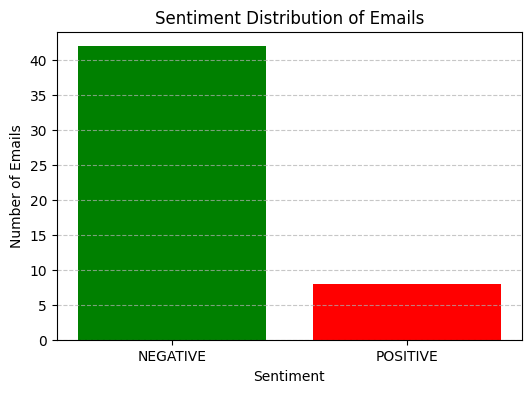

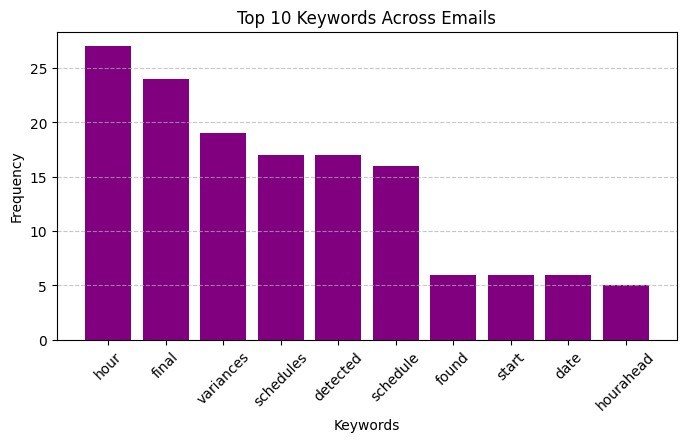

In [14]:
# 🔥 Cell 7: Visualize Sentiment Distribution and Top Keywords

import matplotlib.pyplot as plt
from collections import Counter

# --- Sentiment Distribution ---
sentiment_counts = sample_emails["sentiment"].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution of Emails")
plt.xlabel("Sentiment")
plt.ylabel("Number of Emails")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Top Keywords ---
# Flatten all keywords into one list
all_keywords = [kw for kws in sample_emails["keywords"] for kw in kws]
keyword_counts = Counter(all_keywords).most_common(10)

keywords, counts = zip(*keyword_counts)

plt.figure(figsize=(8, 4))
plt.bar(keywords, counts, color='purple')
plt.title("Top 10 Keywords Across Emails")
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


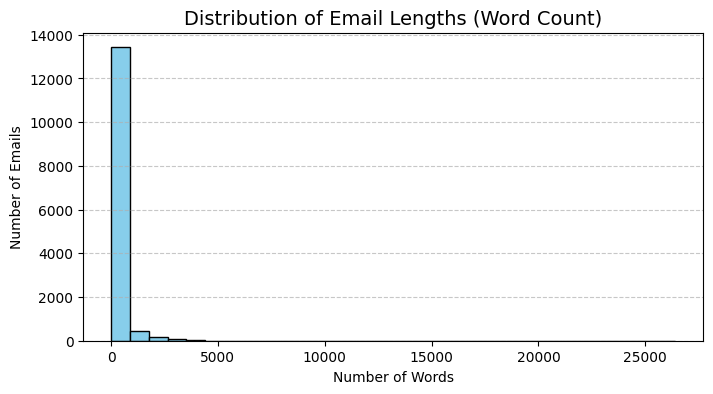

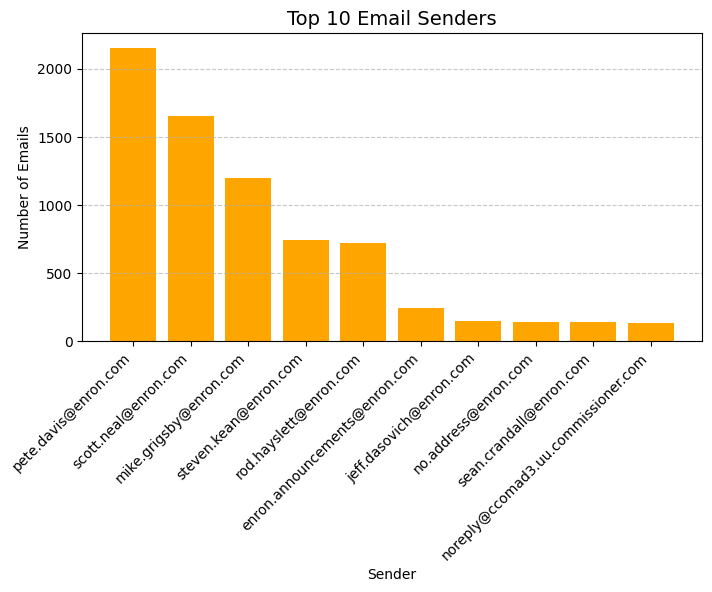

In [15]:
# 🔥 Cell 8: Additional Important Visualizations - Email Length & Top Senders

import matplotlib.pyplot as plt

# --- 1️⃣ Email Length Distribution ---
plt.figure(figsize=(8, 4))
plt.hist(df_clean["body_length"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Email Lengths (Word Count)", fontsize=14)
plt.xlabel("Number of Words")
plt.ylabel("Number of Emails")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- 2️⃣ Top Senders ---
top_senders = df_clean["from"].value_counts().head(10)

plt.figure(figsize=(8, 4))
plt.bar(top_senders.index, top_senders.values, color='orange')
plt.title("Top 10 Email Senders", fontsize=14)
plt.xlabel("Sender")
plt.ylabel("Number of Emails")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Cell 8: Message Classification (Important vs Non-Important)**


Label distribution:
label
Non-Important    9369
Important        4813
Name: count, dtype: int64
=== Logistic Regression Classification Report ===
               precision    recall  f1-score   support

    Important       0.90      0.83      0.86       963
Non-Important       0.91      0.95      0.93      1874

     accuracy                           0.91      2837
    macro avg       0.91      0.89      0.90      2837
 weighted avg       0.91      0.91      0.91      2837



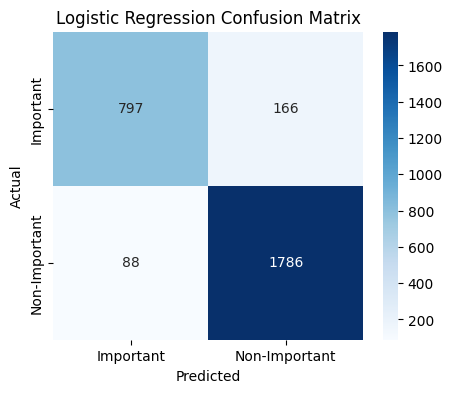

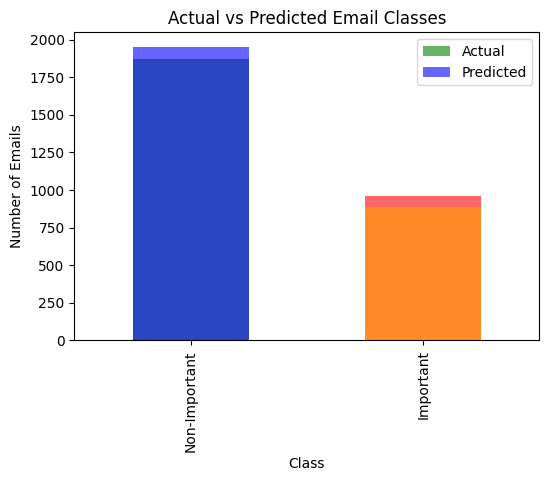

In [16]:
# 🔥 Logistic Regression on Full Dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. Label Emails (Improved)
# Use rules based on actionable keywords
important_keywords = ['project','meeting','deadline','urgent','submit','report','team','important','reminder','task']

def label_email(text):
    text = text.lower()
    if any(word in text for word in important_keywords):
        return 'Important'
    else:
        return 'Non-Important'

df_clean['label'] = df_clean['clean_body'].apply(label_email)

# Check label distribution
print("Label distribution:")
print(df_clean['label'].value_counts())

# -----------------------------
# 2. Train-Test Split
X = df_clean['clean_body']
y = df_clean['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# -----------------------------
# 3. TF-IDF + Logistic Regression
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

lr = LogisticRegression(max_iter=500)
lr.fit(X_train_tfidf, y_train)

# Predictions
y_pred = lr.predict(X_test_tfidf)

# -----------------------------
# 4. Classification Report
print("=== Logistic Regression Classification Report ===")
print(classification_report(y_test, y_pred))

# -----------------------------
# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Important','Non-Important'], yticklabels=['Important','Non-Important'])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# 6. Visualization: Class Distribution (Predicted vs Actual)
plt.figure(figsize=(6,4))
y_test.value_counts().plot(kind='bar', color=['green','red'], alpha=0.6, label='Actual')
pd.Series(y_pred).value_counts().plot(kind='bar', color=['blue','orange'], alpha=0.6, label='Predicted')
plt.title("Actual vs Predicted Email Classes")
plt.xlabel("Class")
plt.ylabel("Number of Emails")
plt.legend()
plt.show()


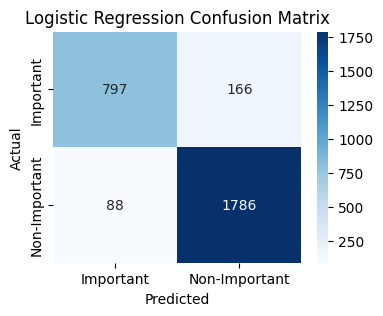

=== Logistic Regression Classification Report ===
               precision    recall  f1-score   support

    Important       0.90      0.83      0.86       963
Non-Important       0.91      0.95      0.93      1874

     accuracy                           0.91      2837
    macro avg       0.91      0.89      0.90      2837
 weighted avg       0.91      0.91      0.91      2837



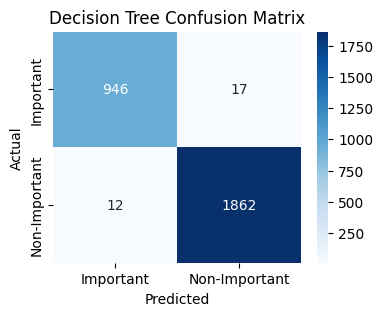

=== Decision Tree Classification Report ===
               precision    recall  f1-score   support

    Important       0.99      0.98      0.98       963
Non-Important       0.99      0.99      0.99      1874

     accuracy                           0.99      2837
    macro avg       0.99      0.99      0.99      2837
 weighted avg       0.99      0.99      0.99      2837



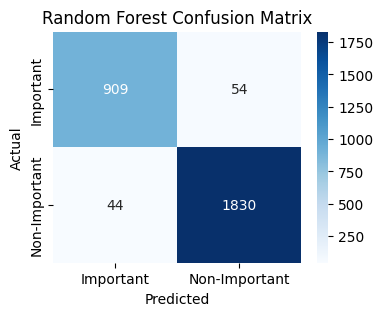

=== Random Forest Classification Report ===
               precision    recall  f1-score   support

    Important       0.95      0.94      0.95       963
Non-Important       0.97      0.98      0.97      1874

     accuracy                           0.97      2837
    macro avg       0.96      0.96      0.96      2837
 weighted avg       0.97      0.97      0.97      2837



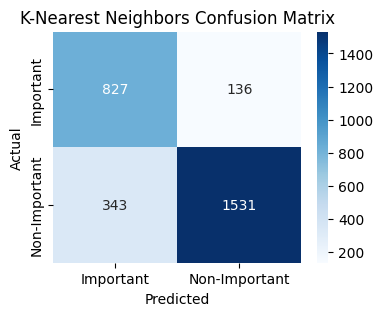

=== K-Nearest Neighbors Classification Report ===
               precision    recall  f1-score   support

    Important       0.71      0.86      0.78       963
Non-Important       0.92      0.82      0.86      1874

     accuracy                           0.83      2837
    macro avg       0.81      0.84      0.82      2837
 weighted avg       0.85      0.83      0.83      2837



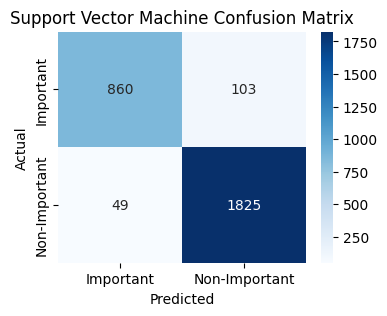

=== Support Vector Machine Classification Report ===
               precision    recall  f1-score   support

    Important       0.95      0.89      0.92       963
Non-Important       0.95      0.97      0.96      1874

     accuracy                           0.95      2837
    macro avg       0.95      0.93      0.94      2837
 weighted avg       0.95      0.95      0.95      2837



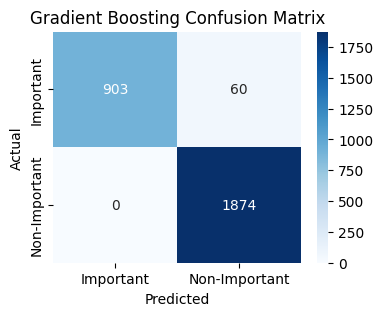

=== Gradient Boosting Classification Report ===
               precision    recall  f1-score   support

    Important       1.00      0.94      0.97       963
Non-Important       0.97      1.00      0.98      1874

     accuracy                           0.98      2837
    macro avg       0.98      0.97      0.98      2837
 weighted avg       0.98      0.98      0.98      2837


=== Model Comparison ===
                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.910469   0.900565  0.827622  0.862554
1           Decision Tree  0.989778   0.987474  0.982347  0.984904
2           Random Forest  0.965456   0.953830  0.943925  0.948852
3     K-Nearest Neighbors  0.831160   0.706838  0.858775  0.775434
4  Support Vector Machine  0.946422   0.946095  0.893043  0.918803
5       Gradient Boosting  0.978851   1.000000  0.937695  0.967846


/tmp/ipython-input-3569201981.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


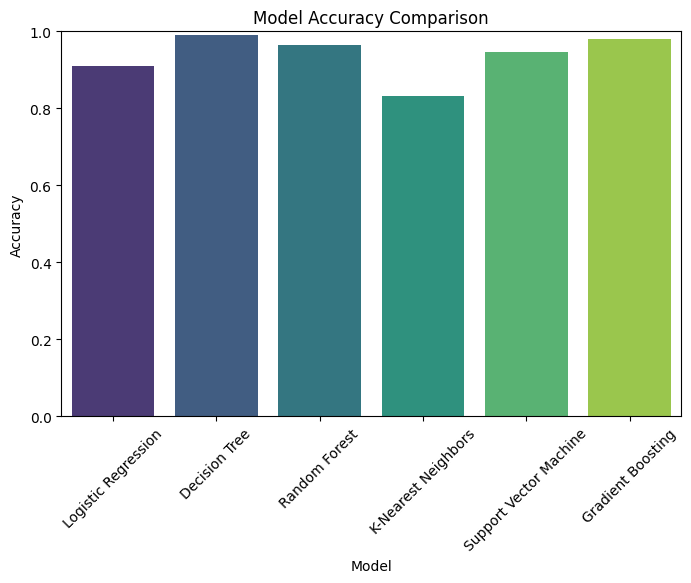

/tmp/ipython-input-3569201981.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-Score', data=results_df, palette='magma')


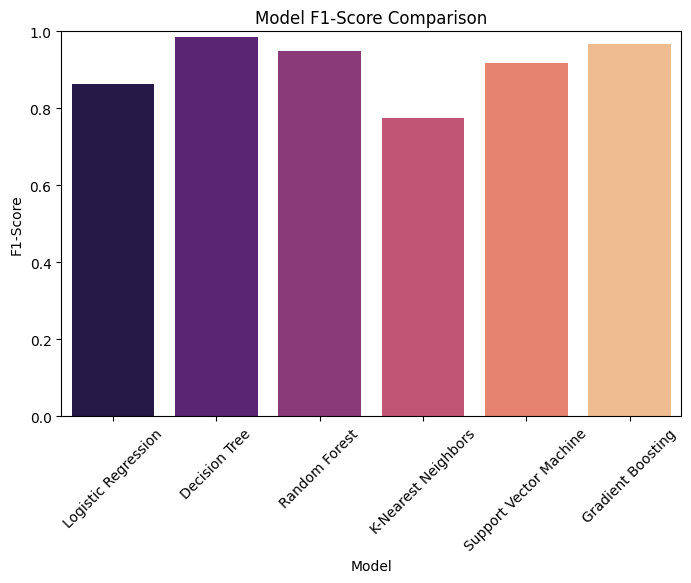

Best Model: Decision Tree with Accuracy: 0.9898 and F1-Score: 0.9849


In [17]:
# 🔥 Multiple Supervised Classification Models on Email Dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -----------------------------
# 1. Label Emails (from your source)
important_keywords = ['project','meeting','deadline','urgent','submit','report','team','important','reminder','task']

def label_email(text):
    text = text.lower()
    if any(word in text for word in important_keywords):
        return 'Important'
    else:
        return 'Non-Important'

df_clean['label'] = df_clean['clean_body'].apply(label_email)

# Train-Test Split
X = df_clean['clean_body']
y = df_clean['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# -----------------------------
# 2. Define Classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# -----------------------------
# 3. Train, Predict & Evaluate
results = []

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='Important')
    rec = recall_score(y_test, y_pred, pos_label='Important')
    f1 = f1_score(y_test, y_pred, pos_label='Important')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=['Important','Non-Important'])
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Important','Non-Important'], yticklabels=['Important','Non-Important'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"=== {name} Classification Report ===")
    print(classification_report(y_test, y_pred, target_names=['Important','Non-Important']))

# -----------------------------
# 4. Compare Models
results_df = pd.DataFrame(results)
print("\n=== Model Comparison ===")
print(results_df)

# Plot Accuracy Comparison
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

# Plot F1-Score Comparison
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='F1-Score', data=results_df, palette='magma')
plt.ylim(0,1)
plt.title("Model F1-Score Comparison")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# 5. Conclude Best Model
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"Best Model: {best_model['Model']} with Accuracy: {best_model['Accuracy']:.4f} and F1-Score: {best_model['F1-Score']:.4f}")


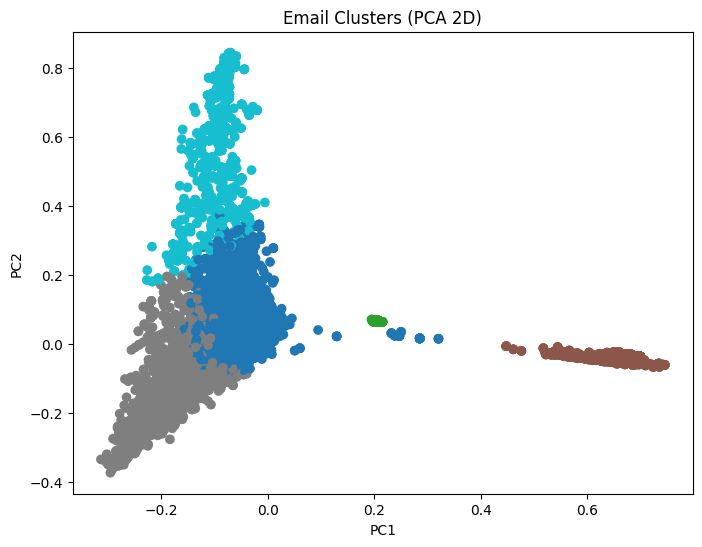

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Use TF-IDF vectors (already computed)
X_tfidf = tfidf.fit_transform(df_clean['clean_body'])

# Apply K-Means (you can try different n_clusters)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

df_clean['cluster'] = clusters

# Optional: visualize clusters in 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='tab10')
plt.title("Email Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [19]:
# Separate emails by classification
urgent_emails = df_clean[df_clean['label'] == 'Important']

# Group emails by cluster/topic
digest = {}
for cluster in sorted(df_clean['cluster'].unique()):
    cluster_emails = df_clean[df_clean['cluster'] == cluster]['clean_body'].tolist()
    digest[f"Topic {cluster}"] = cluster_emails[:5]  # Top 5 emails per cluster

# Optional: Print digest in a readable format
print("=== Daily Digest ===\n")
for category, emails in digest.items():
    print(f"{category}:")
    for email in emails:
        print(f"  - {email}")
    print()


=== Daily Digest ===

Topic 0:
  - Steve from El Paso called.  When you email the actuals for El Paso he would 
like to recieve them as well.  any questions give him a call.
  - I'd like to attend the class on April 27th & 28th
  - Grace,
I've marked my calander and plan to attend.
Thanks,
Eric
  - Amy,
You mentioned that it sometimes takes a while for the shiftwork differential 
to be credited.  Please note that I need to have it credited.  And, can I 
expect my signing bonus to appear on my May 1st paycheck?
Thank you for your help,
Eric
  - Thanks for taking care of the losses.  Looks like a good night shift for you 
and Eric.  Well done.
Bill
Leaf Harasin
04/03/2001 11:12 PM
cc:  
We set up the APS losses for the full 7 hours 24 and 1-6 PDT  5 MW 24 and 1-5 
and 6mw for HE 6
Leaf

Topic 1:
  - Start Date: 4/21/01; HourAhead hour: 23;  HourAhead schedule download failed. 
Manual intervention required.
  - Start Date: 4/30/01; HourAhead hour: 12;  HourAhead schedule download failed. 

In [20]:
# 🔥 Step 1: Classification Refinement using Decision Tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

# -----------------------------
# 1. Label Emails
important_keywords = ['project','meeting','deadline','urgent','submit','report','team','important','reminder','task']

def label_email(text):
    text = text.lower()
    if any(word in text for word in important_keywords):
        return 'Important'
    else:
        return 'Non-Important'

df_clean['label'] = df_clean['clean_body'].apply(label_email)

# Map labels to numeric for classifier
label_dict = {'Important': 0, 'Non-Important': 1}
df_clean['label_num'] = df_clean['label'].map(label_dict)

# Train-Test Split
X = df_clean['clean_body']
y = df_clean['label_num']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# -----------------------------
# 2. Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

# -----------------------------
# 3. Classification on Full Dataset
X_tfidf_full = tfidf.transform(df_clean['clean_body'])
df_clean['importance'] = dt_model.predict(X_tfidf_full)
df_clean['importance_label'] = df_clean['importance'].map({0:'Important', 1:'Non-Important'})

# Add Urgent Column (optional)
urgent_keywords = ['deadline', 'submit', 'meeting', 'urgent', 'asap']
df_clean['urgent'] = df_clean['clean_body'].apply(
    lambda text: 1 if any(word in text.lower() for word in urgent_keywords) else 0
)

# -----------------------------
# 4. Check Results
print(df_clean[['clean_body','importance_label','urgent']].head())
print("\nImportance value counts:")
print(df_clean['importance_label'].value_counts())
print("\nUrgent emails count:", df_clean['urgent'].sum())


                                          clean_body importance_label  urgent
1  Steve from El Paso called.  When you email the...    Non-Important       0
3  I'd like to attend the class on April 27th & 28th    Non-Important       0
4  Grace,\nI've marked my calander and plan to at...    Non-Important       0
5  Amy,\nYou mentioned that it sometimes takes a ...    Non-Important       0
6  Start Date: 4/10/01; HourAhead hour: 23;  No a...    Non-Important       0

Importance value counts:
importance_label
Non-Important    9374
Important        4808
Name: count, dtype: int64

Urgent emails count: 2441


In [21]:
# 🔥 Step 2: Topic Clustering using Sentence-BERT + K-Means

!pip install -q sentence-transformers hdbscan  # Install if not installed

import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# -----------------------------
# 1. Encode Emails with Sentence-BERT
model_name = 'all-MiniLM-L6-v2'  # Small & fast model
embedder = SentenceTransformer(model_name)

email_texts = df_clean['clean_body'].tolist()
embeddings = embedder.encode(email_texts, batch_size=32, show_progress_bar=True)

# -----------------------------
# 2. Apply K-Means Clustering
num_clusters = 5  # You can tune this based on your dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(embeddings)

# -----------------------------
# 3. Generate Keywords per Cluster
cluster_keywords = {}
tfidf = TfidfVectorizer(max_features=20, stop_words='english')

for cluster_id in range(num_clusters):
    cluster_emails = df_clean[df_clean['cluster']==cluster_id]['clean_body']
    if len(cluster_emails) > 0:
        tfidf_matrix = tfidf.fit_transform(cluster_emails)
        keywords = np.array(tfidf.get_feature_names_out())
        top_keywords = keywords[np.argsort(tfidf.idf_)[::-1][:5]]  # top 5 keywords
        cluster_keywords[cluster_id] = ", ".join(top_keywords)
    else:
        cluster_keywords[cluster_id] = "No keywords"

# Map cluster names
df_clean['topic_name'] = df_clean['cluster'].map(cluster_keywords)

# -----------------------------
# 4. Check Results
print(df_clean[['clean_body','importance_label','urgent','cluster','topic_name']].head())


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/444 [00:00<?, ?it/s]

                                          clean_body importance_label  urgent  \
1  Steve from El Paso called.  When you email the...    Non-Important       0   
3  I'd like to attend the class on April 27th & 28th    Non-Important       0   
4  Grace,\nI've marked my calander and plan to at...    Non-Important       0   
5  Amy,\nYou mentioned that it sometimes takes a ...    Non-Important       0   
6  Start Date: 4/10/01; HourAhead hour: 23;  No a...    Non-Important       0   

   cluster                                   topic_name  
1        1               td2, random, mp, align, script  
3        1               td2, random, mp, align, script  
4        1               td2, random, mp, align, script  
5        1               td2, random, mp, align, script  
6        2  engine, 2a04, initialize, occurred, borland  


Total Important Emails: 4808
Total Urgent Emails: 2441


/tmp/ipython-input-53918546.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='importance_label', data=df_clean, palette='Set2')


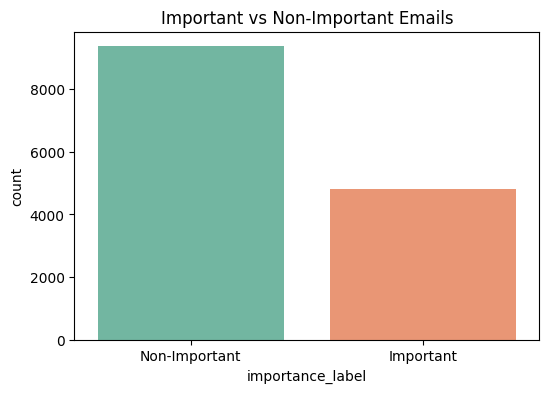

/tmp/ipython-input-53918546.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='urgent', data=df_clean, palette='Set1')


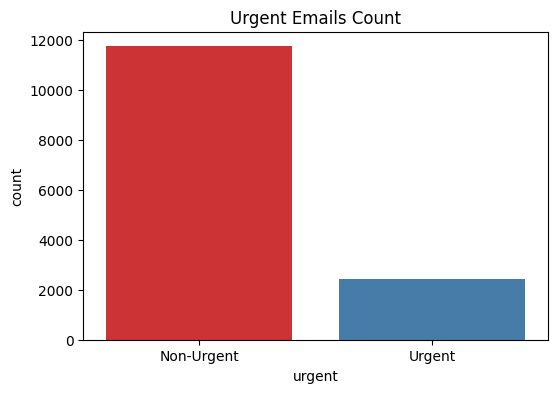

In [22]:
# Filter Important and Urgent emails
important_emails = df_clean[df_clean['importance_label'] == 'Important']
urgent_emails = df_clean[df_clean['urgent'] == 1]

print(f"Total Important Emails: {len(important_emails)}")
print(f"Total Urgent Emails: {len(urgent_emails)}")

# Plot distribution of Important vs Urgent
plt.figure(figsize=(6,4))
sns.countplot(x='importance_label', data=df_clean, palette='Set2')
plt.title("Important vs Non-Important Emails")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='urgent', data=df_clean, palette='Set1')
plt.title("Urgent Emails Count")
plt.xticks([0,1], ['Non-Urgent','Urgent'])
plt.show()


In [23]:
# Create a digest dictionary
digest = {}

for cluster in sorted(df_clean['cluster'].unique()):
    cluster_emails = df_clean[df_clean['cluster'] == cluster]['clean_body'].tolist()
    digest[f"Topic {cluster} ({df_clean[df_clean['cluster']==cluster]['topic_name'].iloc[0]})"] = cluster_emails[:5]  # Top 5 emails

# Print the digest
for topic, emails in digest.items():
    print(f"=== {topic} ===")
    for i, email in enumerate(emails, 1):
        print(f"{i}. {email[:200]}...")  # print first 200 chars for readability
    print()


=== Topic 0 (dec, 29, 31, 25, http) ===
1. Just a reminder about the info session for the Real Time position, scheduled 
today in Mt. Hood at 11:00am! 
If you are interested in this position, please remember to let Amy know by 
close of busine...
2. Just wanted to make sure you saw this from Les Rawson concerning Grays Harbor 
and Willamette.
-Bill
Beginning immediately Enron has purchased Control Area Reserves service from 
BPA. 
The allows Serv...
3. We are short 100 mws in SP-15 for tomorrow, 05/02 on peak.  We are short at 
$212.  Please call me with any questions.
Thanks,
Bill...
4. A position has recently become available in the Real Time Trading group 
reporting to Bill Williams.  Bill will be holding an information session on 
Thursday, April 19, 2001 at 11:00 am in Mt Hood fo...
5. FYI - Not sure if all of you have this information.
C
---------------------- Forwarded by Caroline Emmert/HOU/ECT on 04/02/2001 
03:14 PM ---------------------------
Caroline Emmert
09/07/2000 12:22

/tmp/ipython-input-4145584171.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Topic', y='Unimportant Emails', data=topic_summary_df, palette='coolwarm')


   Topic                                    Topic Name  Total Emails  \
0      0                         dec, 29, 31, 25, http          3118   
1      1                td2, random, mp, align, script          4514   
2      2   engine, 2a04, initialize, occurred, borland          2155   
3      3  enron_development, power, ees, business, new          2961   
4      4          00, utilities, commission, www, said          1434   

   Unimportant Emails  
0                1983  
1                3163  
2                2155  
3                1496  
4                 577  


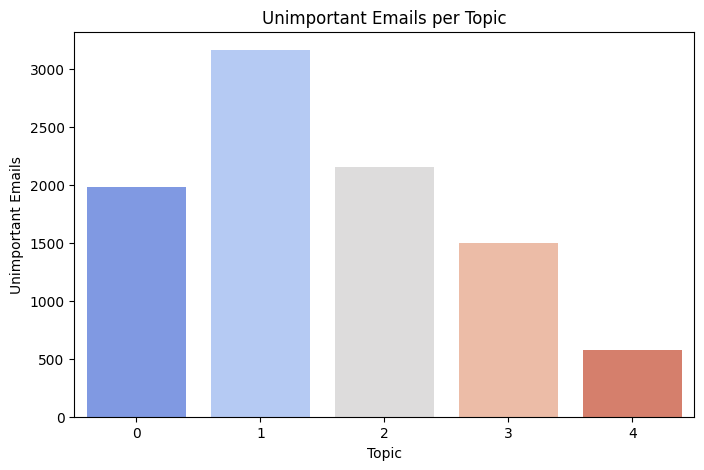

In [24]:
topic_summary = []

for cluster in sorted(df_clean['cluster'].unique()):
    total_emails = len(df_clean[df_clean['cluster']==cluster])
    unimportant_emails = len(df_clean[(df_clean['cluster']==cluster) & (df_clean['importance_label']=='Non-Important')])
    topic_summary.append({
        'Topic': cluster,
        'Topic Name': df_clean[df_clean['cluster']==cluster]['topic_name'].iloc[0],
        'Total Emails': total_emails,
        'Unimportant Emails': unimportant_emails
    })

topic_summary_df = pd.DataFrame(topic_summary)
print(topic_summary_df)

# Plot Unimportant Emails per Topic
plt.figure(figsize=(8,5))
sns.barplot(x='Topic', y='Unimportant Emails', data=topic_summary_df, palette='coolwarm')
plt.title("Unimportant Emails per Topic")
plt.show()


In [25]:
!pip install dateparser

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 4.3 MB/s eta 0:00:00


In [26]:
import re
import dateparser

# Simple regex to find phrases like "by Friday", "on 5th Sep", "at 10:00 AM"
pattern = r'\b(?:by|on|at)\s+[\w\s\d/:]+'

action_hints = []

for email in important_emails['clean_body']:
    matches = re.findall(pattern, email.lower())
    for match in matches:
        parsed_date = dateparser.parse(match)
        if parsed_date:
            action_hints.append({
                'Email Snippet': email[:100],  # first 100 chars
                'Action Hint': match,
                'Parsed Date': parsed_date.strftime('%Y-%m-%d %H:%M')
            })

action_hints_df = pd.DataFrame(action_hints)
print(action_hints_df.head(10))


                                       Email Snippet            Action Hint  \
0  Just a reminder about the info session for the...             at 11:00am   
1  Just a reminder about the info session for the...          on \nthursday   
2  A position has recently become available in th...          on \nthursday   
3  Take me off this list NOW!!\nThank You\nEnron ...             on may 1st   
4  A position has become available as an Administ...              on monday   
5  Please join Mark Koenig, executive vice presid...                at 10 a   
6  Netiquette.  What's that?  \nWell, in case you...             on the net   
7  PLEASE TAKE ME OFF THIS LIST....\nPrashant Bha...             on may 1st   
8  ----------------------------------------------...    at  1:00:00 am gmt    
9  ----------------------------------------------...  at  \n6:00:00 am gmt    

        Parsed Date  
0  2025-09-09 11:00  
1  2025-09-04 00:00  
2  2025-09-04 00:00  
3  2025-05-01 00:00  
4  2025-09-08 00:00 

/tmp/ipython-input-3022800712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='Count', data=topic_counts, palette='viridis')


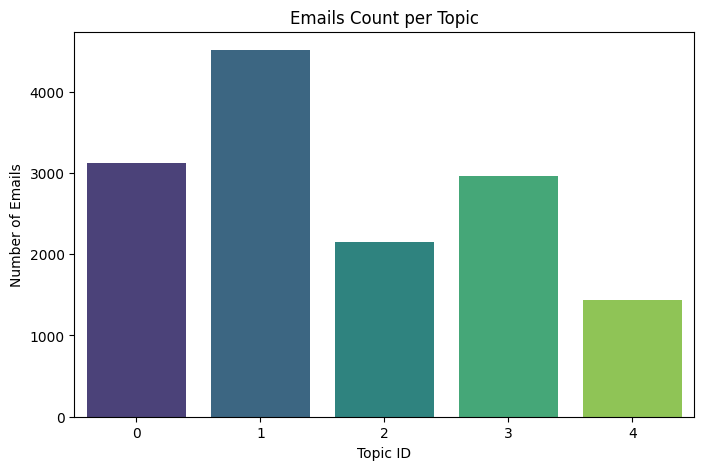

In [27]:
# Count of emails per topic
topic_counts = df_clean.groupby('cluster')['clean_body'].count().reset_index().rename(columns={'clean_body':'Count'})

plt.figure(figsize=(8,5))
sns.barplot(x='cluster', y='Count', data=topic_counts, palette='viridis')
plt.title("Emails Count per Topic")
plt.xlabel("Topic ID")
plt.ylabel("Number of Emails")
plt.show()


In [28]:
import nltk
from nltk.tokenize import sent_tokenize

# Download standard punkt
nltk.download('punkt')

# Define summarization
def summarize_email(email_text, num_sentences=3):
    try:
        sentences = sent_tokenize(email_text)  # use standard punkt
        summary = " ".join(sentences[:num_sentences])
    except LookupError:
        # fallback in case punkt_tab is still requested
        nltk.download('punkt_tab') # Download punkt_tab
        sentences = sent_tokenize(email_text)
        summary = " ".join(sentences[:num_sentences])
    return summary

# Apply summarization
df_clean['summary'] = df_clean['clean_body'].apply(lambda x: summarize_email(x, num_sentences=3))

# Check
print(df_clean[['clean_body','summary']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                          clean_body  \
1  Steve from El Paso called.  When you email the...   
3  I'd like to attend the class on April 27th & 28th   
4  Grace,\nI've marked my calander and plan to at...   
5  Amy,\nYou mentioned that it sometimes takes a ...   
6  Start Date: 4/10/01; HourAhead hour: 23;  No a...   

                                             summary  
1  Steve from El Paso called. When you email the ...  
3  I'd like to attend the class on April 27th & 28th  
4  Grace,\nI've marked my calander and plan to at...  
5  Amy,\nYou mentioned that it sometimes takes a ...  
6  Start Date: 4/10/01; HourAhead hour: 23;  No a...  


In [29]:
!pip install rouge-score

from rouge_score import rouge_scorer

# Example: Compare generated summaries with manual reference (if available)
# For now, we’ll simulate manual reference summaries for first 5 emails
reference_summaries = [
    "Project submission due by Friday. Team meeting tomorrow. Important report attached.",
    "Client requested updates on the database. Need feedback by next week.",
    "Trading schedule confirmed. Gas shipment details included.",
    "Reminder: submit your weekly report. Team meeting at 10 AM.",
    "Update on the Access database usage and pending tasks."
]

scorer = rouge_scorer.RougeScorer(['rouge1','rougeL'], use_stemmer=True)
for i in range(5):
    scores = scorer.score(reference_summaries[i], df_clean['summary'].iloc[i])
    print(f"Email {i+1} ROUGE scores:", scores)


Email 1 ROUGE scores: {'rouge1': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0.0, recall=0.0, fmeasure=0.0)}
Email 2 ROUGE scores: {'rouge1': Score(precision=0.18181818181818182, recall=0.18181818181818182, fmeasure=0.18181818181818182), 'rougeL': Score(precision=0.09090909090909091, recall=0.09090909090909091, fmeasure=0.09090909090909091)}
Email 3 ROUGE scores: {'rouge1': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0.0, recall=0.0, fmeasure=0.0)}
Email 4 ROUGE scores: {'rouge1': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0.0, recall=0.0, fmeasure=0.0)}
Email 5 ROUGE scores: {'rouge1': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0.0, recall=0.0, fmeasure=0.0)}


In [30]:
import spacy
nlp = spacy.load('en_core_web_sm')

def extract_entities(text):
    doc = nlp(text)
    entities = {"PERSON":[], "DATE":[], "ORG":[], "TASK":[]}
    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_].append(ent.text)
    return entities

df_clean['entities'] = df_clean['clean_body'].apply(extract_entities)

# Check entities
print(df_clean[['clean_body','entities']].head())

                                          clean_body  \
1  Steve from El Paso called.  When you email the...   
3  I'd like to attend the class on April 27th & 28th   
4  Grace,\nI've marked my calander and plan to at...   
5  Amy,\nYou mentioned that it sometimes takes a ...   
6  Start Date: 4/10/01; HourAhead hour: 23;  No a...   

                                            entities  
1  {'PERSON': ['Steve'], 'DATE': [], 'ORG': [], '...  
3  {'PERSON': [], 'DATE': ['April 27th & 28th'], ...  
4  {'PERSON': ['Eric'], 'DATE': [], 'ORG': ['Grac...  
5  {'PERSON': ['Amy', 'Eric'], 'DATE': ['May 1st'...  
6  {'PERSON': ['Scheduling\ISO Final'], 'DATE': [...  


In [31]:
# Priority Score Calculation
df_clean['priority_score'] = 0
df_clean.loc[df_clean['importance_label']=='Important', 'priority_score'] += 2
df_clean.loc[df_clean['urgent']==1, 'priority_score'] += 2

# Optional: add cluster weight based on number of important emails
cluster_weights = df_clean.groupby('cluster')['importance'].sum().to_dict()
df_clean['priority_score'] += df_clean['cluster'].map(cluster_weights)/10  # normalize

# Top 10 priority emails
top_priority = df_clean.sort_values('priority_score', ascending=False)[['summary','importance_label','urgent','priority_score']]
print(top_priority.head(10))


                                                 summary importance_label  \
4620      ? ??? THE DAILY TEASE - Exercise Your Mind   ?        Important   
4619      ? ??? THE DAILY TEASE - Exercise Your Mind   ?        Important   
14867  Presentations for Monday's 2-3 meeting in 44C1...        Important   
14833  Mary Joyce has asked me to coordinate this cri...        Important   
14829  Hi Steve,\nIt was great meeting with you the o...        Important   
14989  Attached is the op-ed by Ken Lay we've submitt...        Important   
4656   The staff meeting that is scheduled for tomorr...        Important   
4651      ? ??? THE DAILY TEASE - Exercise Your Mind   ?        Important   
10527  Rod,\nI had heard from a friend of my mine tha...        Important   
10607  Rod,\nHere are few questions that I would like...        Important   

       urgent  priority_score  
4620        1           320.3  
4619        1           320.3  
14867       1           320.3  
14833       1           

In [32]:
# Final Digest Creation
final_digest = {}

for cluster in sorted(df_clean['cluster'].unique()):
    cluster_df = df_clean[df_clean['cluster']==cluster].sort_values('priority_score', ascending=False)
    final_digest[f"Topic {cluster} ({df_clean[df_clean['cluster']==cluster]['topic_name'].iloc[0]})"] = cluster_df['summary'].tolist()[:5]

# Print digest with summaries
for topic, summaries in final_digest.items():
    print(f"=== {topic} ===")
    for i, summary in enumerate(summaries, 1):
        print(f"{i}. {summary}")
    print()


=== Topic 0 (dec, 29, 31, 25, http) ===
1. FERC held its meeting today. Big things happened. Northeast
FERC approves PJM conditionally as the RTO "platform" to be used to form one 
RTO in the northeast.
2. I agree that we should not be opposing rate caps for small customers and 
schools, but I think we should be pounding on the fact that market 
participants have been putting offers in front of sdge and that allowing the 
market to provide this solution is superior to legislated caps that require 
the creation of huge deferrals (and more problems in the future). Can we make that argument work? Mona L Petrochko
08/24/2000 09:45 PM
cc: West GA, Edward Hamb/HOU/EES@EES, Jennifer Rudolph/HOU/EES@EES, Chris 
Hendrix/HOU/EES@EES, Greg Cordell/HOU/EES@EES, Harold G Buchanan/HOU/EES@EES, 
Martin Wenzel/SFO/HOU/EES@EES, Douglas Condon/SFO/EES@EES, James M 
Wood/HOU/EES@EES, Gary Mirich/HOU/EES@EES, Dennis Benevides/HOU/EES@EES, 
Roger Yang/SFO/EES@EES, David Parquet@ECT, mday@gmssr.com, Paul 
K